# 📊 Sentiment Analysis and Visualization of Social Media Data


Welcome to this exploratory analysis notebook where we analyze public sentiment from Twitter data to understand public opinions and attitudes towards various brands and topics.

In [3]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
sns.set(style='whitegrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 📥 Load Datasets

In [4]:
train_df = pd.read_csv('twitter_training.csv', header=None, names=['tweet_id', 'entity', 'sentiment', 'text'])
valid_df = pd.read_csv('twitter_validation.csv', header=None, names=['tweet_id', 'entity', 'sentiment', 'text'])

In [5]:
df = pd.concat([train_df, valid_df], ignore_index=True)
df.drop_duplicates(subset='text', inplace=True)
df.head()

,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## 📊 Sentiment Distribution

C:\Users\user\AppData\Local\Temp\ipykernel_1332\1043373773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


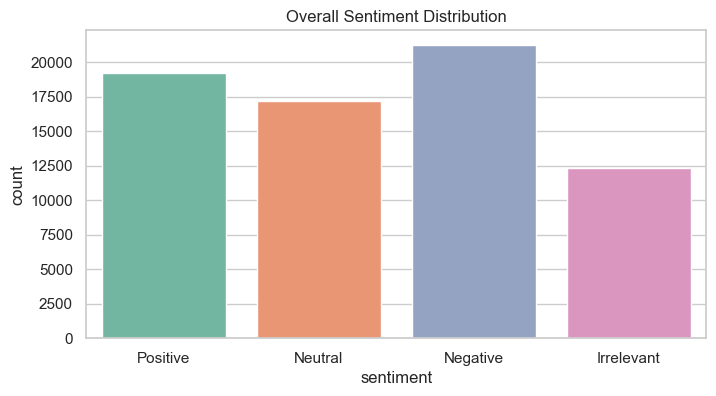

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.show()

## 📌 Brand-wise Sentiment

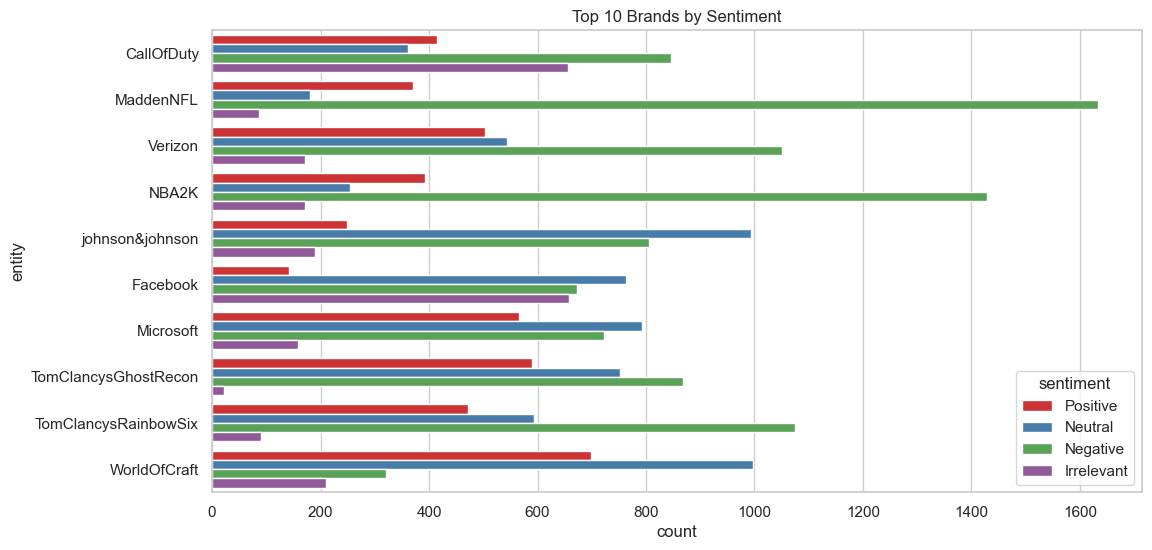

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='entity', hue='sentiment', order=df['entity'].value_counts().index[:10], palette='Set1')
plt.title('Top 10 Brands by Sentiment')
plt.show()

## 🧹 Text Cleaning

In [9]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [10]:
df['clean_text'] = df['text'].apply(clean_text)

## ☁️ Word Clouds by Sentiment

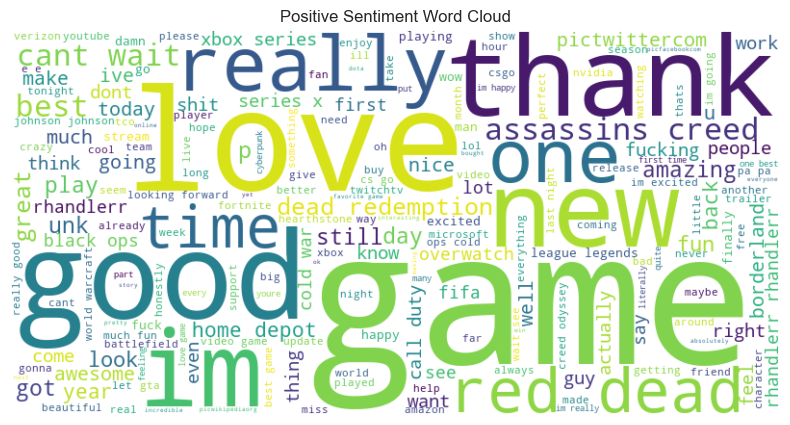

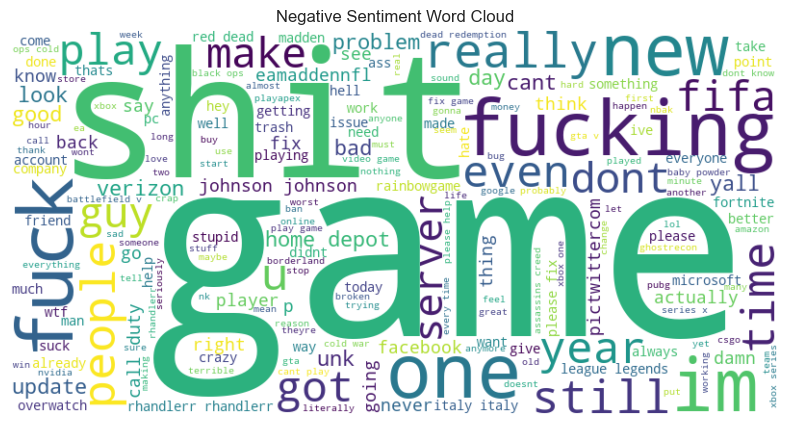

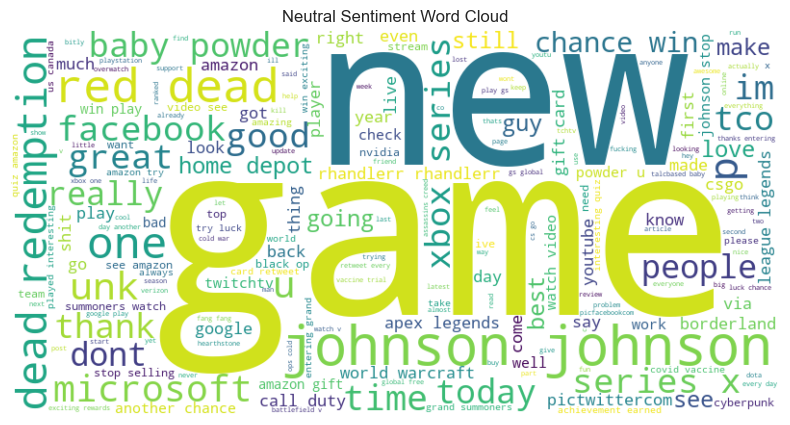

In [11]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment} Sentiment Word Cloud')
    plt.show()